### Audio preprocessing
- wave form
- fft :-  spectrum
- stft spectrogram
- MFCCS

In [6]:
import librosa,librosa.display
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/usr/local/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


loading the audio file

In [7]:
#wave form
signal,sample_rate = librosa.load("audio1.wav",sr = 22050)

In [3]:
print(signal)

[-0.00185699 -0.00277056 -0.00259728 ... -0.01916508 -0.01632752
  0.        ]


In [4]:
print(sample_rate)

22050


The number values that numpy array contains equal to :- sample_rate * duration_of_audio ,in our case we have 22050*33 = 727650,each of the values present in the numpy array is the amplitude of the waveform

In [5]:
type(signal)

numpy.ndarray

In [6]:
signal.size

739329

##### Wave form

Text(0, 0.5, 'Amplitude')

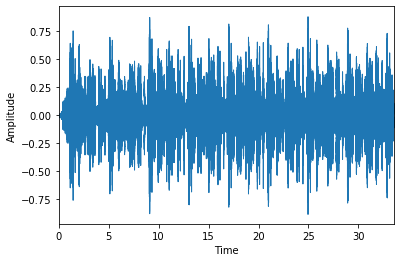

In [7]:
librosa.display.waveplot(signal,sr=sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")

now we are converting time domain to frequency domain by applying fourior transformation

##### Spectrum

In [8]:
fft = np.fft.fft(signal)
#taking the magnitude of the each frequency
magnitude = np.abs(fft)
#taking the relative frequency
frequency = np.linspace(0,sample_rate,len(magnitude))

#these together telling us how much each frequency contrubting for the entire sound

This magnitude indicate the contrubition of each frequency to the overall sound

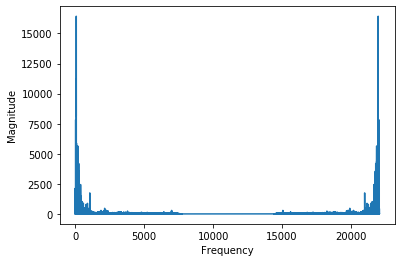

In [9]:
plt.plot(frequency,magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

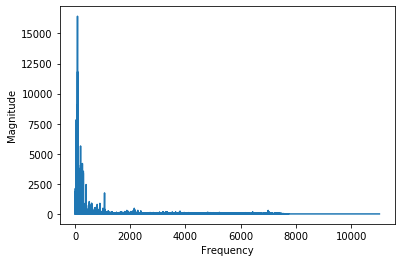

In [10]:
# taking only half part of the graph  as the graph is symentric
freq = frequency[:int(len(frequency)/2)]
mag = magnitude[:int(len(frequency)/2)]
plt.plot(freq,mag)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

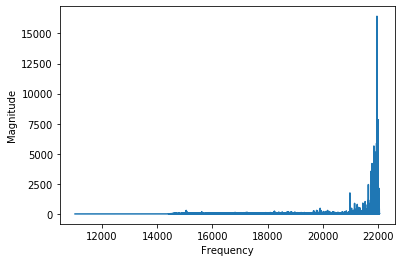

In [11]:
# taking only half part of the graph  as the graph is symentric
freq = frequency[int(len(frequency)/2):]
mag = magnitude[int(len(frequency)/2):]
plt.plot(freq,mag)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### spectrogram

In [12]:
sample_size = 2048
shift_fouir_transform = 512

hop_length = shift_fouir_transform
n_fft=sample_size

In [13]:
n=librosa.core.stft(signal , hop_length = hop_length,n_fft=n_fft)

In [54]:
import torch
x = torch.tensor([1, 2, 3, 4])
'''
print(x.view(-1,1).shape)
torch.unsqueeze(x, 0)
'''
print(x)
print(x.view(-1,1).shape)
print(x.dim())
x.view(-1,1)

tensor([1, 2, 3, 4])
torch.Size([4, 1])
1


tensor([[1],
        [2],
        [3],
        [4]])

In [58]:
#y=torch.squeeze(x).view(-1,1)
print(torch.squeeze(x).view(-1,1).shape)
print(torch.squeeze(x).view(-1,1).dim())
print(torch.squeeze(x).view(-1,1))

torch.Size([4, 1])
2
tensor([[1],
        [2],
        [3],
        [4]])


In [56]:
print(torch.unsqueeze(x,1).view(-1,1).shape)
print(torch.unsqueeze(x,1).view(-1,1).dim())
print(x)

torch.Size([4, 1])
2
tensor([1, 2, 3, 4])


In [31]:
#tensor([[ 1,  2,  3,  4]])
torch.unsqueeze(x, 1).view(-1,1).shape

torch.Size([4, 1])

In [81]:
x = torch.randn(2, 3,2)
x.size()

torch.Size([2, 3, 2])

In [82]:
x.dim()

3

In [83]:
x

tensor([[[-2.3450,  0.6726],
         [-1.3202,  0.7977],
         [-1.0173, -0.6499]],

        [[-0.7888,  0.7911],
         [ 1.1850,  0.5642],
         [ 0.3183,  0.2743]]])

In [96]:
r=torch.transpose(x,0,1)

In [97]:
r.shape

torch.Size([3, 2, 2])

In [101]:
x = torch.zeros(2, 1, 2, 1, 2)
print(x)
print(x.dim())
x.size()

tensor([[[[[0., 0.]],

          [[0., 0.]]]],



        [[[[0., 0.]],

          [[0., 0.]]]]])
5


torch.Size([2, 1, 2, 1, 2])

In [106]:
y = torch.squeeze(x)
print(y.dim())
y.size()

3


torch.Size([2, 2, 2])

In [108]:
y = torch.squeeze(x, 0)
y.size()

torch.Size([2, 1, 2, 1, 2])

In [109]:
y = torch.squeeze(x, 1)
y.size()

torch.Size([2, 2, 1, 2])

In [119]:
x = torch.zeros(1, 2,2)
x.size()

torch.Size([1, 2, 2])

In [120]:
x

tensor([[[0., 0.],
         [0., 0.]]])

In [123]:
y=x.squeeze(0)

In [126]:
y

tensor([[0., 0.],
        [0., 0.]])

In [2]:
import tensorflow as tf
raw_audio = tf.io.read_file('audio1.wav')

In [5]:
type(raw_audio)

tensorflow.python.framework.ops.EagerTensor

In [10]:
tf.audio.decode_wav(raw_audio)

DecodeWav(audio=<tf.Tensor: shape=(536474, 2), dtype=float32, numpy=
array([[-0.00424194,  0.00054932],
       [-0.00656128,  0.0010376 ],
       [-0.00598145,  0.00018311],
       ...,
       [-0.01596069, -0.0171814 ],
       [-0.02334595, -0.00973511],
       [-0.03057861, -0.00579834]], dtype=float32)>, sample_rate=<tf.Tensor: shape=(), dtype=int32, numpy=16000>)

speech to text

https://www.analyticsvidhya.com/blog/2019/07/learn-build-first-speech-to-text-model-python/